In [3]:
import numpy as np
import pandas as pd

# AI/ML for Cybersecurity project (Phase 1: Data Preprocessing and Feature Engineering)
## Group 6
 This project aims at using the Phishing Corpus dataset from UCI to build classification models that can detect phishing websites. In phase 1 of the project, the dataset acquired from the UCI ML repository will be evaluated and preprocessed with the following objectives:
- understanding the dataset
- Cleaning the dataset by handling missing or erroneous values
- Engineer features from URL and webcontent
- Creating additional features based on heuristics to improve detection

In [4]:
#importing dataset
data = pd.read_csv('/teamspace/studios/this_studio/PhiUSIIL_Phishing_URL_Dataset.csv')

In [5]:
#first look at the data
data.head()

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,521848.txt,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.0,1.000000,0.522907,...,0,0,1,34,20,28,119,0,124,1
1,31372.txt,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.0,0.666667,0.032650,...,0,0,1,50,9,8,39,0,217,1
2,597387.txt,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.0,0.866667,0.028555,...,0,0,1,10,2,7,42,2,5,1
3,554095.txt,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.0,1.000000,0.522907,...,1,1,1,3,27,15,22,1,31,1
4,151578.txt,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.0,1.000000,0.079963,...,1,0,1,244,15,34,72,1,85,1


In [6]:
data.columns

Index(['FILENAME', 'URL', 'URLLength', 'Domain', 'DomainLength', 'IsDomainIP',
       'TLD', 'URLSimilarityIndex', 'CharContinuationRate',
       'TLDLegitimateProb', 'URLCharProb', 'TLDLength', 'NoOfSubDomain',
       'HasObfuscation', 'NoOfObfuscatedChar', 'ObfuscationRatio',
       'NoOfLettersInURL', 'LetterRatioInURL', 'NoOfDegitsInURL',
       'DegitRatioInURL', 'NoOfEqualsInURL', 'NoOfQMarkInURL',
       'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL',
       'SpacialCharRatioInURL', 'IsHTTPS', 'LineOfCode', 'LargestLineLength',
       'HasTitle', 'Title', 'DomainTitleMatchScore', 'URLTitleMatchScore',
       'HasFavicon', 'Robots', 'IsResponsive', 'NoOfURLRedirect',
       'NoOfSelfRedirect', 'HasDescription', 'NoOfPopup', 'NoOfiFrame',
       'HasExternalFormSubmit', 'HasSocialNet', 'HasSubmitButton',
       'HasHiddenFields', 'HasPasswordField', 'Bank', 'Pay', 'Crypto',
       'HasCopyrightInfo', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef',
       'NoOfEmptyRef', 'NoOf

In [7]:
#evaluating a few instances
pd.set_option('display.max_rows', None)
data[0:10].T

,0,1,2,3,4,5,6,7,8,9
FILENAME,521848.txt,31372.txt,597387.txt,554095.txt,151578.txt,23107.txt,23034.txt,696732.txt,739255.txt,14486.txt
URL,https://www.southbankmosaics.com,https://www.uni-mainz.de,https://www.voicefmradio.co.uk,https://www.sfnmjournal.com,https://www.rewildingargentina.org,https://www.globalreporting.org,https://www.saffronart.com,https://www.nerdscandy.com,https://www.hyderabadonline.in,https://www.aap.org
URLLength,31,23,29,26,33,30,25,25,29,18
Domain,www.southbankmosaics.com,www.uni-mainz.de,www.voicefmradio.co.uk,www.sfnmjournal.com,www.rewildingargentina.org,www.globalreporting.org,www.saffronart.com,www.nerdscandy.com,www.hyderabadonline.in,www.aap.org
DomainLength,24,16,22,19,26,23,18,18,22,11
IsDomainIP,0,0,0,0,0,0,0,0,0,0
TLD,com,de,uk,com,org,org,com,com,in,org
URLSimilarityIndex,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
CharContinuationRate,1.0,0.666667,0.866667,1.0,1.0,1.0,1.0,1.0,1.0,1.0
TLDLegitimateProb,0.522907,0.03265,0.028555,0.522907,0.079963,0.079963,0.522907,0.522907,0.005084,0.079963


In [8]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
FILENAME,235795,235795,384822.txt,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
URL,235795,235370,https://jauntyimprobableautomaticvectorization...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
URLLength,235795.0,NaN,NaN,NaN,34.573095,41.314153,13.0,23.0,27.0,34.0,6097.0
Domain,235795,220086,ipfs.io,1197,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DomainLength,235795.0,NaN,NaN,NaN,21.470396,9.150793,4.0,16.0,20.0,24.0,110.0
IsDomainIP,235795.0,NaN,NaN,NaN,0.002706,0.051946,0.0,0.0,0.0,0.0,1.0
TLD,235795,695,com,112554,NaN,NaN,NaN,NaN,NaN,NaN,NaN
URLSimilarityIndex,235795.0,NaN,NaN,NaN,78.430778,28.976055,0.155574,57.024793,100.0,100.0,100.0
CharContinuationRate,235795.0,NaN,NaN,NaN,0.845508,0.216632,0.0,0.68,1.0,1.0,1.0
TLDLegitimateProb,235795.0,NaN,NaN,NaN,0.260423,0.251628,0.0,0.005977,0.079963,0.522907,0.522907


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 56 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   FILENAME                    235795 non-null  object 
 1   URL                         235795 non-null  object 
 2   URLLength                   235795 non-null  int64  
 3   Domain                      235795 non-null  object 
 4   DomainLength                235795 non-null  int64  
 5   IsDomainIP                  235795 non-null  int64  
 6   TLD                         235795 non-null  object 
 7   URLSimilarityIndex          235795 non-null  float64
 8   CharContinuationRate        235795 non-null  float64
 9   TLDLegitimateProb           235795 non-null  float64
 10  URLCharProb                 235795 non-null  float64
 11  TLDLength                   235795 non-null  int64  
 12  NoOfSubDomain               235795 non-null  int64  
 13  HasObfuscation

In [10]:
data.shape

(235795, 56)


After exploring the dataset, the following key insights have been acquired:
- the dataset has 235795 rows and 56 columns
- Only 5 features are Non-numeric with the remaining being binary or continuous values
- The mean of the labels is about 0.57 (indicating 57% for class 1 and 43% for class 0), showing reasonable class balance.
- The dataset does not seem to have any missing values, however there does seem to be some missing titles that are not properly labeled as having titles in the 'HasTitle' feature.
- Some features need to be adjusted for outliers becuase of very high maximum values compared to their average, such as 'LargestLineLength' and 'LineofCode'.
- A healthy humber of features exist describing the URL of a phishing website, such as URL length, number of special characters in URL, number of equal signs, and many more. However, not many features are present describing the Domain and Title of the website.

In [11]:
#handling erroneous values at 'HasTitle' column
data.loc[data['Title'] == '0', 'HasTitle'] = 0
data.loc[data['Title'] != '0', 'HasTitle'] = 1

## Feature engineering and creating additional features

Feature engineering is the process of transforming raw data into meaningful features that enhance the performance of machine learning models. Furthermore, more features could be created using heuristics and additional calculations.

In [12]:
#New features for domain beggining, special characters ratio, and numbers
special_chars = ['-', '_', '.', '@']
data['Domain_starts_with_www.'] = data['Domain'].str.startswith('www.').astype(int)
data['special_char_in_domain_ratio'] = data['Domain'].apply(lambda x: sum(1 for c in x if c in special_chars) / len(x) if len(x) > 0 else 0)
data['Domain_contains_number'] = data['Domain'].str.contains(r'\d').astype(int)

In [13]:
#New features for titles containing number and special characters
data['Title_contains_number'] = data['Title'].str.contains(r'\d').astype(int)
data['Title_contains_specialcharacter'] = data['Title'].str.contains(r'[^a-zA-Z0-9]').astype(int)

In [14]:
import re
data['Title_nonalphanumeric_count'] = data['Title'].apply(lambda x: len(re.findall(r'[^\w]', x, flags=re.UNICODE)))

In [15]:
#New feature for uppercase to lowercase ratio
data['url_uppercase_ratio'] = data['URL'].apply(lambda x: sum(1 for c in x if c.isupper()) / len(x) if len(x) > 0 else 0)
data['title_uppercase_ratio'] = data['Title'].apply(lambda x: sum(1 for c in str(x) if c.isupper()) / len(str(x)) if len(str(x)) > 0 else 0)

In [16]:
#New feature for external to internal references ratio
data['external_to_internal_ref_ratio'] = data['NoOfExternalRef'] / (data['NoOfSelfRef'] + 1)

In [17]:
#New feature for image to text ratio
data['image_to_text_ratio'] = data['NoOfImage'] / (data['LineOfCode'] + 1)

In [18]:
#New features to check for shortened URLs
shortening_services = ['bit.ly', 'tinyurl', 'goo.gl', 't.co', 'ow.ly', 'is.gd']
data['is_shortened_url'] = data['Domain'].apply(lambda x: 1 if any(service in x for service in shortening_services) else 0)

In [19]:
#New features for HTML tag to code ratio
data['tag_to_code_ratio'] = (data['NoOfImage'] + data['NoOfCSS'] + data['NoOfJS']) / (data['LineOfCode'] + 1)

In [20]:
# data cleaning and fine tuning

# Convert non-numeric values to numeric
# TLD: Convert to categorical numeric
data['TLD'] = data['TLD'].astype('category').cat.codes

# IsDomainIP: Convert to 0, 1
data['IsDomainIP'] = data['IsDomainIP'].replace({'Yes': 1, 'No': 0}).astype(int)

# HasObfuscation: Convert to 0, 1
data['HasObfuscation'] = data['HasObfuscation'].replace({'Yes': 1, 'No': 0}).astype(int)

# Title, Bank, Pay, Crypto: Encoding via a simple method or keep as is for TF-IDF, etc.
# Example: You can convert them to category codes if needed
for column in ['Title', 'Bank', 'Pay', 'Crypto']:
    data[column] = data[column].astype('category').cat.codes

# HasCopyrightInfo: Convert to 0, 1
data['HasCopyrightInfo'] = data['HasCopyrightInfo'].replace({'Yes': 1, 'No': 0}).astype(int)

# Domain_starts_with_www.: Convert to 0, 1
data['Domain_starts_with_www.'] = data['Domain_starts_with_www.'].replace({'Yes': 1, 'No': 0}).astype(int)

# Domain_contains_number: Convert to 0, 1
data['Domain_contains_number'] = data['Domain_contains_number'].replace({'Yes': 1, 'No': 0}).astype(int)

# Title_contains_number: Convert to 0, 1
data['Title_contains_number'] = data['Title_contains_number'].replace({'Yes': 1, 'No': 0}).astype(int)

# Title_contains_specialcharacter: Convert to 0, 1
data['Title_contains_specialcharacter'] = data['Title_contains_specialcharacter'].replace({'Yes': 1, 'No': 0}).astype(int)

# Title_nonalphanumeric_count: Keep as is (already numeric)

# IsHTTPS: Convert to 0, 1
data['IsHTTPS'] = data['IsHTTPS'].replace({'Yes': 1, 'No': 0}).astype(int)

# url_uppercase_ratio: Map to numbers
data['url_uppercase_ratio'] = data['url_uppercase_ratio'].replace({'High': 2, 'Medium': 1, 'Low': 0}).astype(int)

# title_uppercase_ratio: Map to numbers
data['title_uppercase_ratio'] = data['title_uppercase_ratio'].replace({'High': 2, 'Medium': 1, 'Low': 0}).astype(int)

# external_to_internal_ref_ratio: Map to numbers
data['external_to_internal_ref_ratio'] = data['external_to_internal_ref_ratio'].replace({'High': 2, 'Medium': 1, 'Low': 0}).astype(int)

# is_shortened_url: Convert to 0, 1
data['is_shortened_url'] = data['is_shortened_url'].replace({'Yes': 1, 'No': 0}).astype(int)

# special_char_in_domain_ratio: Map to numbers
data['special_char_in_domain_ratio'] = data['special_char_in_domain_ratio'].replace({'High': 2, 'Medium': 1, 'Low': 0}).astype(int)

### Newly Added Features and Justifications

New features have been engineered to help in detecting phishing websites. These features were chosen based on the characteristics of phishing websites commonly identified in academic research.

- **Domain_starts_with_www.**: This feature identifies if the domain starts with "www." Legitimate websites typically adhere to conventional URL structures, and deviations from this format may indicate phishing behavior. Phishing websites might skip this prefix to create ambiguity or seem unconventional [1].

- **special_char_in_domain_ratio**: The ratio of special characters (such as `-`, `_`, `.`, `@`) present in the domain name is calculated. These characters are often used by phishing websites to mimic legitimate domains or to obscure the actual intent of the website. Phishing sites that heavily rely on special characters can be flagged as suspicious [2].

- **Domain_contains_number**: This feature checks if numeric characters are present in the domain. Phishing websites often include numbers in their domain names to impersonate legitimate websites or bypass filters. Numbers in domain names are a common feature in phishing attempts [3].

- **Title_contains_number**: Phishing sites may include numbers in their page titles, especially when attempting to mimic institutions like banks or ecommerce sites. Since legitimate titles rarely contain numbers, this feature can help distinguish phishing sites from legitimate ones [4].

- **Title_contains_specialcharacter**: This feature flags special characters in the page title. Phishing websites often use special characters to draw user attention or obfuscate their true intentions. Legitimate websites seldom include such characters in their titles, making their presence suspicious [5].

- **Title_nonalphanumeric_count**: The total number of non-alphanumeric characters in the title is calculated. Non-alphanumeric characters, including symbols and punctuation, are commonly used in phishing attacks as part of their obfuscation strategies. This feature helps to detect such patterns [6].

- **is_shortened_url**: This feature identifies whether the URL has been shortened using popular URL shortening services (e.g., bit.ly, tinyurl). Phishing websites frequently use shortened URLs to hide the actual destination, making it difficult for users to detect malicious intent. Shortened URLs are a known indicator of phishing behavior [7].

- **tag_to_code_ratio**: This feature calculates the ratio of HTML tags to the total amount of code in the page source. Phishing websites often have a higher number of tags compared to legitimate websites, as they use HTML tricks to manipulate the appearance of the page and deceive users. A higher tag-to-code ratio can therefore signal potential phishing activity [8].

- **url_uppercase_ratio** and **title_uppercase_ratio**: The ratios of uppercase letters in the URL and title are calculated. Phishing websites may use uppercase letters to emphasize certain parts of the URL or title, making them appear important or legitimate. A high uppercase ratio is often a sign of malicious intent [5][6].

- **external_to_internal_ref_ratio**: This feature measures the ratio of external to internal references. Phishing websites frequently link to external malicious sites or use excessive redirects. A high external reference ratio can be a strong signal of phishing [9].

- **image_to_text_ratio**: This feature computes the ratio of images to text content. Phishing websites may use more images than text to mask their malicious intent or create the illusion of legitimacy. A high image-to-text ratio often correlates with phishing attempts [10].

## References
1. Abbasi, H., Abbasi, M., & Javidan, R. (2019). A Comparative Study on Phishing Detection Techniques. IEEE Access, 7, 52946–52963. https://doi.org/10.1109/ACCESS.2019.2910954
2. Zhang, P., Wang, W., Zhang, X., & Li, Y. (2018). A Machine Learning-Based Phishing Detection Framework Using URL Features. IEEE Transactions on Network and Service Management, 15(4), 1332–1345. https://doi.org/10.1109/TNSM.2018.2877796
3. Marchal, S., Francois, J., State, R., & Engel, T. (2017). PhishStorm: Detecting Phishing with Streaming Analytics. IEEE Transactions on Network and Service Management, 14(3), 626-640. https://doi.org/10.1109/TNSM.2017.2718619
4. Basnet, M., Sung, A. H., & Liu, Q. (2011). Rule-based Phishing Attack Detection. Proceedings of the 8th International Conference on Information Technology: New Generations, 249-254. https://doi.org/10.1109/ITNG.2011.48
5. Jain, A. K., & Gupta, B. B. (2014). A Machine Learning Based Approach for Phishing Detection Using URLs. Proceedings of the 7th International Conference on Contemporary Computing, 265-270. https://doi.org/10.1109/IC3.2014.6897205
6. Dash, T. K., Sahoo, A. K., & Giri, M. S. (2018). Phishing Website Detection Based on URL Features. Proceedings of the 2018 International Conference on Smart Computing and Communication, 23-29. https://doi.org/10.1109/SMARTCOM.2018.8707851
7. Song, J., Lee, J., & Kim, S. (2015). Suspicious URL Detection Based on Word Embedding and N-Gram Features. Proceedings of the 2015 IEEE International Conference on Computer and Information Technology, 106–113. https://doi.org/10.1109/CIT/IUCC/DASC/PICOM.2015.33
8. Mohammad, M. A., Thabtah, F., & McCluskey, L. (2014). Predicting Phishing Websites Based on Self-Structuring Neural Networks. Neural Computing and Applications, 25(2), 443-458. https://doi.org/10.1007/s00521-013-1510-7
9. Canova, G., Volkamer, M., Bergmann, C., & Borza, R. (2014). NoPhish: An Anti-Phishing Education App. Proceedings of the 9th International Conference on Availability, Reliability, and Security (ARES), 261-269. https://doi.org/10.1109/ARES.2014.38
10. Mohammad, M. A., Thabtah, F., & McCluskey, L. (2014). Predicting Phishing Websites Based on Self-Structuring Neural Networks. Neural Computing and Applications, 25(2), 443-458. https://doi.org/10.1007/s00521-013-1510-7
ttps://doi.org/10.1007/s00521-013-1510-7


## Multicollinearity
Multicollinearity occurs when two or more independent features are highly correlated, meaning they can predict one another better than they predict the dependent variable. Given the large number of numerical features in the dataset, **Variance Inflation Factor (VIF)** is an excellent method for evaluating multicollinearity. VIFmeasuress how much the variance of a feature is inflated due to its correlation with other features. Features with VIF values above 5 indicate moderate multicollinearity, while values above 10 suggest severe multicollinearity, which could negatively impact model performance by distorting the coefficients and interpretations of features.


In [21]:
!pip install statsmodels --upgrade

In [22]:

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
numeric_data = data.select_dtypes(include=['float64', 'int64'])

scaler = StandardScaler()
numeric_data_scaled = scaler.fit_transform(numeric_data)

vif_data = pd.DataFrame()
vif_data['Feature'] = numeric_data.columns
vif_data['VIF'] = [variance_inflation_factor(numeric_data_scaled, i) for i in range(numeric_data_scaled.shape[1])]

print(vif_data)


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


                            Feature          VIF
0                         URLLength  7048.368550
1                      DomainLength     4.086638
2                        IsDomainIP     1.758587
3                URLSimilarityIndex    11.790632
4              CharContinuationRate     4.689515
5                 TLDLegitimateProb     1.555857
6                       URLCharProb     2.590549
7                         TLDLength     1.329563
8                     NoOfSubDomain     3.630861
9                    HasObfuscation     2.873458
10               NoOfObfuscatedChar     7.617328
11                 ObfuscationRatio     3.271119
12                 NoOfLettersInURL  3497.629840
13                 LetterRatioInURL     5.170190
14                  NoOfDegitsInURL   581.286401
15                  DegitRatioInURL     5.904332
16                  NoOfEqualsInURL    13.830728
17                   NoOfQMarkInURL     2.874896
18               NoOfAmpersandInURL     5.619622
19       NoOfOtherSp

### Analysis
Although several features indicate to have a VIF score severly exceeding 10, most features are related to the URL metrics (such as URL length, URL letters, etc.). No features will be removed at this phase of the project however this insight can be used later on to improve the performance of the ML models.

## Outlier handling
Outliers can have a negative impact on models' perfomrmance by adding an element of bias to the training process. By removing outliers, it can be ensured that the models focus on the core patterns in the data, leading to more reliable and accurate predictions. **Interquartile range (IQR) method will be used to remove the outliers.

In [23]:
# Step 1: Extract non-binary numeric feature
non_binary_numeric_features = data.loc[:, data.apply(lambda x: x.nunique() > 2 and x.dtype in ['int64', 'float64'])].columns

# Step 2: Create a copy of the original dataframe
filtered_data = data.copy()

# Step 3: Remove outliers using 3 IQR method
Q1 = filtered_data[non_binary_numeric_features].quantile(0.25)
Q3 = filtered_data[non_binary_numeric_features].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 3 * IQR
upper_bound = Q3 + 3 * IQR
filtered_data = filtered_data[~((filtered_data[non_binary_numeric_features] < lower_bound) |
                                (filtered_data[non_binary_numeric_features] > upper_bound)).any(axis=1)]
filtered_data.shape

(75950, 68)

With **75,000 rows**, this dataset remains large enough to train robust machine learning models. Unfiltered data can be kept for any further exploratory data analysis (EDA) or to re-valuate/re-perform the outlier handling process.

In [24]:
#Saving data to excel files
data.to_csv('unfiltered_phishing_data.csv', index=False)
filtered_data.to_csv('filtered_phishing_data.csv', index=False)


In [25]:
#Downloading excel files
from IPython.display import FileLink
display(FileLink('unfiltered_phishing_data.csv'))
display(FileLink('filtered_phishing_data.csv'))

/teamspace/studios/this_studio/unfiltered_phishing_data.csv

/teamspace/studios/this_studio/filtered_phishing_data.csv

## Phase 2: Implementation of Basic Machine Learning Models

### Tasks:
- Implement foundational classification models, including **Logistic Regression** and **k-Nearest Neighbors (k-NN)**.
- Train the models on the preprocessed dataset.
- Evaluate model performance using standard metrics such as **accuracy**, **precision**, **recall**, **F1-score**, and **confusion matrix**.
- Apply **cross-validation** to measure model generalizability and robustness.

### Deliverable:
A comprehensive report that includes:
- Detailed descriptions of model implementation,
- Performance evaluation using key metrics,
- Cross-validation results,
- The associated code provided in a **Jupyter Notebook**.



### data preperation for models

In [26]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

In [27]:
pd.set_option('display.max_rows', None)
data[0:10].T

,0,1,2,3,4,5,6,7,8,9
FILENAME,521848.txt,31372.txt,597387.txt,554095.txt,151578.txt,23107.txt,23034.txt,696732.txt,739255.txt,14486.txt
URL,https://www.southbankmosaics.com,https://www.uni-mainz.de,https://www.voicefmradio.co.uk,https://www.sfnmjournal.com,https://www.rewildingargentina.org,https://www.globalreporting.org,https://www.saffronart.com,https://www.nerdscandy.com,https://www.hyderabadonline.in,https://www.aap.org
URLLength,31,23,29,26,33,30,25,25,29,18
Domain,www.southbankmosaics.com,www.uni-mainz.de,www.voicefmradio.co.uk,www.sfnmjournal.com,www.rewildingargentina.org,www.globalreporting.org,www.saffronart.com,www.nerdscandy.com,www.hyderabadonline.in,www.aap.org
DomainLength,24,16,22,19,26,23,18,18,22,11
IsDomainIP,0,0,0,0,0,0,0,0,0,0
TLD,231,254,647,231,503,503,231,231,368,503
URLSimilarityIndex,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
CharContinuationRate,1.0,0.666667,0.866667,1.0,1.0,1.0,1.0,1.0,1.0,1.0
TLDLegitimateProb,0.522907,0.03265,0.028555,0.522907,0.079963,0.079963,0.522907,0.522907,0.005084,0.079963


In [28]:
# check the shape of the data (rows, columns)
data = filtered_data
print(data.shape)

(75950, 68)


In [29]:
# Split the dataset into training and testing sets
X = data.drop(['label', 'URL', 'FILENAME', 'Domain'], axis=1)
y = data['label']

SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=SEED)

# Standardize the dataset. Scale both X_train and X_test

# use the function scaler.transform
scaler = StandardScaler()

# Fit only on X_train
scaler.fit(X_train)

# Scale both X_train and X_test
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Model #1: kNN

In [30]:

# Train a KNN model with K=5
# use the function KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [31]:
# Make predictions
y_pred = knn.predict(X_test)

In [32]:
# Evaluate the model (calculate accuracy and confusion matrix)
accuracy = accuracy_score(y_test, y_pred)
confusion_matrix = confusion_matrix(y_test, y_pred)

In [33]:
# Print the result of the accuracy and confusion matrix
print("Accuracy:", accuracy)
print("Confusion Matrix:", confusion_matrix)

Accuracy: 0.998604344963792
Confusion Matrix: [[12850    41]
 [   12 25072]]


In [34]:
# Perform 5-fold cross-validation using KNN with K=5
# use the function cross_val_score
cv_scores = cross_val_score(knn, X, y, cv=5)

In [35]:
# Displaying the cross-validation scores and mean accuracy
print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", cv_scores.mean())

Cross-validation scores: [0.9764977  0.97156024 0.96800527 0.97109941 0.97175774]
Mean accuracy: 0.9717840684660961


In [36]:
# Calculate accuracy for K values between 1 and 10. Calculate both the train and test accuracies.
train_accuracies = []
test_accuracies = []
for k in range(1, 11):
	knn = KNeighborsClassifier(n_neighbors=k)
	knn.fit(X_train, y_train)
	train_accuracy = knn.score(X_train, y_train)
	test_accuracy = knn.score(X_test, y_test)
	train_accuracies.append(train_accuracy)
	test_accuracies.append(test_accuracy)

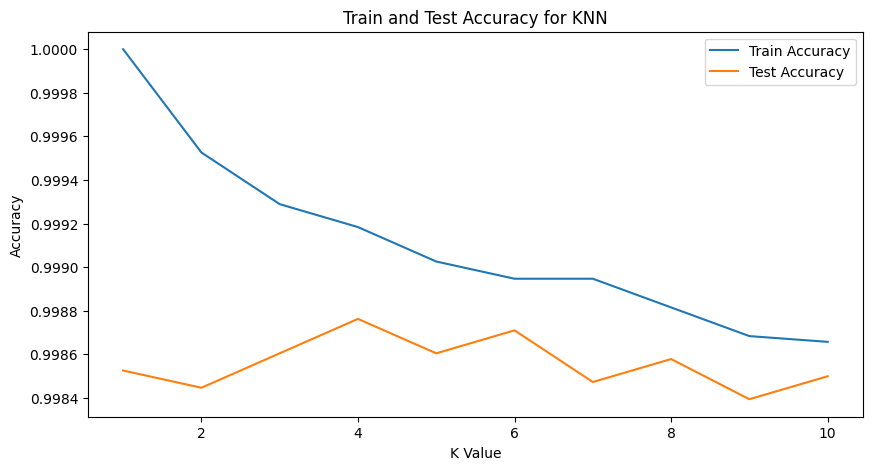

In [37]:
# Visualize the results of step 10, including the train and test accuracies.
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), train_accuracies, label='Train Accuracy')
plt.plot(range(1, 11), test_accuracies, label='Test Accuracy')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy for KNN')
plt.legend()
plt.show()

# Logistic Regression

## 1. Import Libraries

In [38]:
import pandas as pd
import joblib
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import KFold, cross_val_score

## 3. Define the Logistic Regression Model Using a Pipeline

In [39]:

# Initialize the model
log_reg = LogisticRegression(
    penalty='l2',             # L2 regularization (Ridge)
    C=1.0,                    # Regularization strength
    solver='lbfgs',           # Optimization algorithm
    max_iter=100,             # Maximum number of iterations
    class_weight='balanced',  # Handle class imbalance
    random_state=42           # Random state for reproducibility
)

In [40]:
# Fit the model on training data (X_train, y_train)
log_reg.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', random_state=42)

## 4. Train the Logistic Regression Model

In [41]:
# Make predictions
y_pred = log_reg.predict(X_test)
y_pred

array([1, 1, 0, ..., 0, 1, 1])

## 5. Evaluate the Model

In [42]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)
# Print evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.9999
Precision: 0.9999
Recall: 0.9999
F1 Score: 0.9999
Confusion Matrix:
[[12886     5]
 [    0 25084]]


## 6. Perform K-Fold Cross-Validation

In [43]:
# Perform cross-validation
cv = KFold(n_splits=5, random_state=42, shuffle=True)
cv_scores = cross_val_score(log_reg, X_train, y_train, cv=cv, scoring='accuracy')

## 7. Results Summary

In [44]:
# Results
{
    "accuracy": accuracy,
    "precision": precision,
    "recall": recall,
    "f1_score": f1,
    "confusion_matrix": conf_matrix,
    "cross_val_scores": cv_scores,
    "mean_cross_val_score": cv_scores.mean()
}

{'accuracy': 0.9998683344305465,
 'precision': 0.9998683606702469,
 'recall': 0.9998683344305465,
 'f1_score': 0.9998683282214498,
 'confusion_matrix': array([[12886,     5],
        [    0, 25084]]),
 'cross_val_scores': array([1.        , 1.        , 0.99986833, 1.        , 0.99973667]),
 'mean_cross_val_score': 0.9999210006583279}

# Phase 2 summary

## Phase 3: Building advanced models
- Tasks:
  - Implement advanced machine learning models, including:
    - XGBoost: A powerful ensemble method using gradient boosting.
    - Support Vector Machine (SVM): For finding the optimal boundary between classes.
    - Neural Networks: A simple feed-forward neural network architecture for classification.
    - Choice of Advanced Neural Network (e.g., CNN, RNN, Transformer Based, etc.)
  - Compare the performance of advanced models with basic models.
  - Optimize hyperparameters using grid search or random search.
  - Use additional evaluation metrics like AUC-ROC curves for model performance.
- Deliverable: A comprehensive report comparing the performance of basic vs. advanced models, optimization steps, and final results in terms of model accuracy and robustness, along with the Jupyter Notebook containing the code


### Simple NN model

/tmp/ipykernel_28003/2997773148.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=feature, data=data, palette='coolwarm')


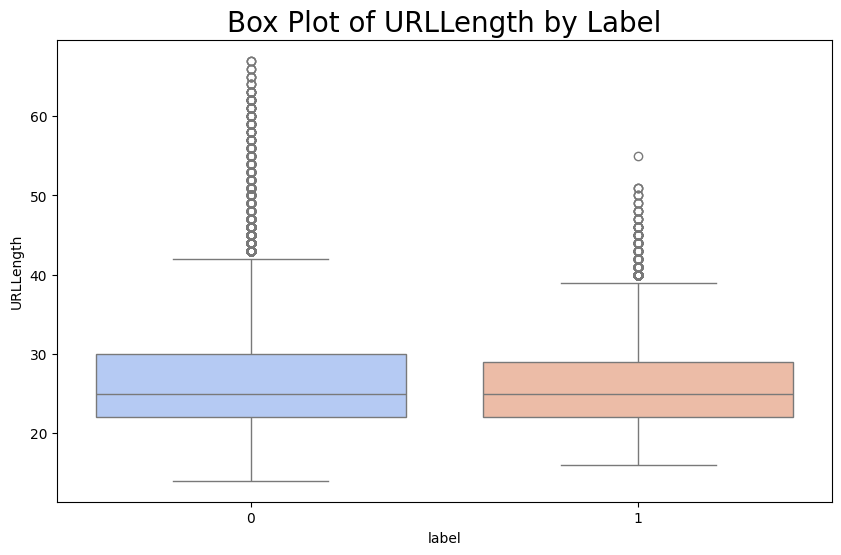

/tmp/ipykernel_28003/2997773148.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=feature, data=data, palette='coolwarm')


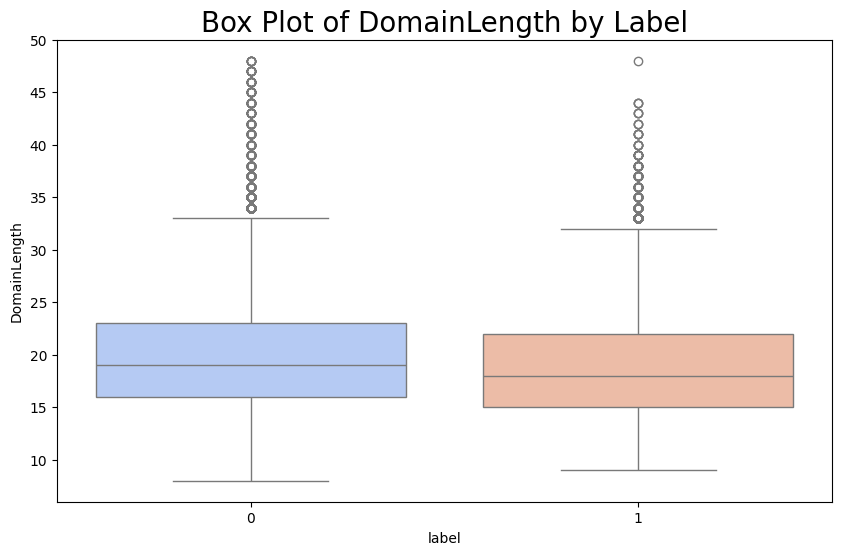

/tmp/ipykernel_28003/2997773148.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=feature, data=data, palette='coolwarm')


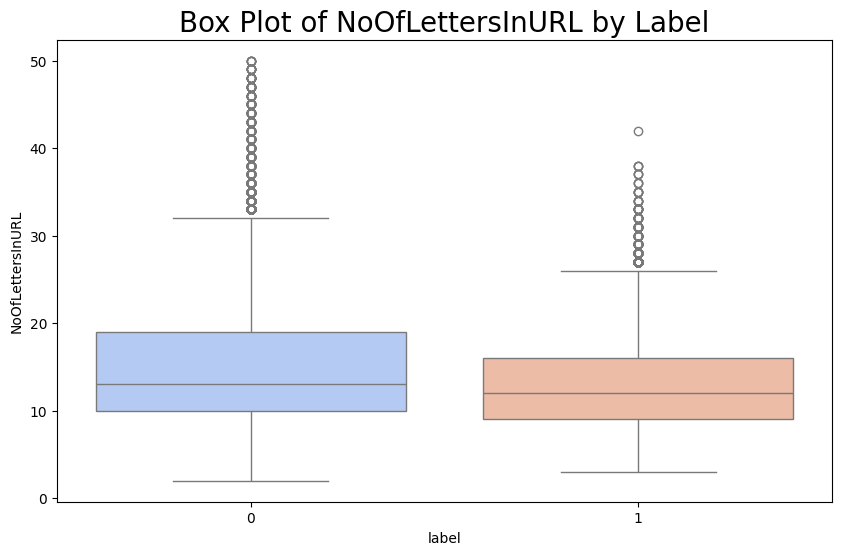

/tmp/ipykernel_28003/2997773148.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=feature, data=data, palette='coolwarm')


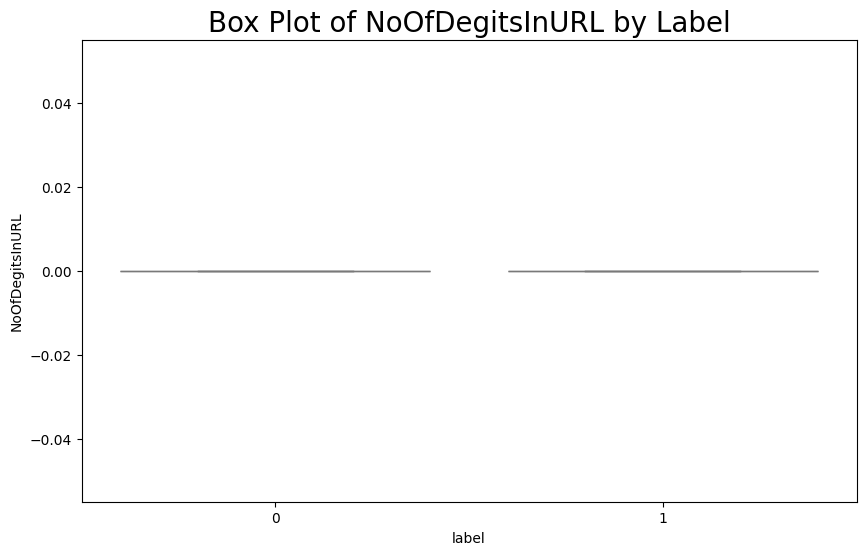

In [45]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of different features by label using box plots for classification analysis
features = ['URLLength', 'DomainLength', 'NoOfLettersInURL', 'NoOfDegitsInURL']
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='label', y=feature, data=data, palette='coolwarm')
    plt.title(f'Box Plot of {feature} by Label', size=20)
    plt.show()

In [46]:
# split df1 into feature1 and target1
feature1 = data.drop(columns=['FILENAME', 'URL', 'Domain','label'])
target1 = data['label']

#### K-fold cross validation

In [47]:
# create an instance of stratified K-fold cross validation
from sklearn.model_selection import StratifiedKFold

K = 5

skf = StratifiedKFold(n_splits=K, shuffle=True, random_state=0) # 5-fold cross validation

#### MLP neural network

In [48]:
from sklearn.neural_network import MLPClassifier

# create an instance of an MLP neural network

# 1000 maxinum number of epoches
# 1 layer of 30 hidden neurons
mlp = MLPClassifier(random_state=1, max_iter=1000, hidden_layer_sizes=(30))

total_train_score = 0
total_validate_score = 0

fold = 1
for train_index, validate_index in skf.split(feature1, target1):
    X_train, X_validate = feature1.iloc[train_index], feature1.iloc[validate_index]
    y_train, y_validate = target1.iloc[train_index], target1.iloc[validate_index]

    mlp.fit(X_train, y_train)
    train_score = mlp.score(X_train, y_train)
    validate_score = mlp.score(X_validate, y_validate)

    print(f"Fold {fold}: Train Score = {train_score}, Validation Score = {validate_score}")

    total_train_score += train_score
    total_validate_score += validate_score

    fold += 1

avg_train_score = total_train_score / K
avg_validate_score = total_validate_score / K

print(f"Average Train Score: {avg_train_score}")
print(f"Average Validation Score: {avg_validate_score}")


Fold 1: Train Score = 0.9942067149440421, Validation Score = 0.9940750493745886
Fold 2: Train Score = 0.9929065174456879, Validation Score = 0.9942067149440421
Fold 3: Train Score = 0.9861092824226465, Validation Score = 0.9851876234364714
Fold 4: Train Score = 0.9921329822251481, Validation Score = 0.9917050691244239
Fold 5: Train Score = 0.9954246214614878, Validation Score = 0.9967083607636603
Average Train Score: 0.9921560236998024
Average Validation Score: 0.9923765635286375


In [49]:
# create another instance of an MLP neural network with different hyperparameter(s)

# 1000 maxinum number of epoches
# 2 layer of 10 hidden neurons each
mlp = MLPClassifier(random_state=1, max_iter=1000, hidden_layer_sizes=(10, 10))

# ==================================

# Run K-fold cross validation again

total_train_score = 0
total_validate_score = 0

fold = 1
for train_index, validate_index in skf.split(feature1, target1):
    print("Fold", fold)
    print("=======")
    X_train  = feature1.iloc[train_index, :]
    X_validate = feature1.iloc[validate_index, :]
    y_train = target1.iloc[train_index]
    y_validate = target1.iloc[validate_index]

    print("TRAIN:", X_train.shape, y_train.shape)
    # number of samples for each class
    # print(pd.Index(y_train).value_counts())

    print("VALIDATION:", X_validate.shape, y_validate.shape)
    # number of samples for each class
    # print(pd.Index(y_validate).value_counts())

    # fit mlp with the training data for this fold
    mlp.fit(X_train, y_train)

    # get the score (accuracy) for the training set
    train_score = mlp.score(X_train, y_train)
    total_train_score += train_score

    # get the score (accuracy) for the validation set
    validate_score = mlp.score(X_validate, y_validate)
    total_validate_score += validate_score

    print("Training set score: {:.2f}".format(train_score))
    print("Validation set score: {:.2f}".format(validate_score))
    print("==================================")

    fold += 1
    print()

print("##################################")
print("Average training set score: {:.2f}".format(total_train_score/K))
print("Average validation set score: {:.2f}".format(total_validate_score/K))


Fold 1
TRAIN: (60760, 64) (60760,)
VALIDATION: (15190, 64) (15190,)


Training set score: 1.00
Validation set score: 1.00

Fold 2
TRAIN: (60760, 64) (60760,)
VALIDATION: (15190, 64) (15190,)
Training set score: 0.99
Validation set score: 0.99

Fold 3
TRAIN: (60760, 64) (60760,)
VALIDATION: (15190, 64) (15190,)
Training set score: 1.00
Validation set score: 0.99

Fold 4
TRAIN: (60760, 64) (60760,)
VALIDATION: (15190, 64) (15190,)
Training set score: 0.98
Validation set score: 0.98

Fold 5
TRAIN: (60760, 64) (60760,)
VALIDATION: (15190, 64) (15190,)
Training set score: 0.99
Validation set score: 1.00

##################################
Average training set score: 0.99
Average validation set score: 0.99


In [50]:
# Choose the model that gives you the best average validation set score (i.e., the second model in our example)
# (In case of the same aveage validation set score, choose the one with the highest average training set score)

mlp = MLPClassifier(random_state=1, max_iter=1000, hidden_layer_sizes=(10, 10))

# Fit the chosen model again using the whole training set (Why is this needed?)
mlp.fit(feature1, target1)

# Apply the chosen model to the (final) testing set
X_test = data.drop(columns=['FILENAME', 'URL', 'Domain', 'label'])
y_test = data['label']

test_score = mlp.score(X_test, y_test)
print("Testing set score: {:.2f}".format(test_score))

Testing set score: 0.99


### Comparing Simple NN and kNN (should be a comparison between all models at once, let's do it once all models are ready)

In [51]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Define the kNN model
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the kNN model using the whole training set
knn.fit(feature1, target1)

# Predictions for the testing set
y_pred_knn = knn.predict(X_test)

# Calculate the accuracy of the kNN model on the testing set
test_accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Testing set accuracy (kNN): {:.2f}".format(test_accuracy_knn))

# Compare with MLP performance
print("Testing set accuracy (MLP): {:.2f}".format(test_score))


Testing set accuracy (kNN): 0.98
Testing set accuracy (MLP): 0.99


We find no difference in prediction accuracy between a simple NN and kNN model.

### Optimizing hyperparameters using grid search

In [52]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for MLP
parameter_space = {
    'hidden_layer_sizes': [(10, 10), (50,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

# Create a GridSearchCV object with MLPClassifier
mlp_gs = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
mlp_gs.fit(feature1, target1)

# Print the best parameters
print("Best parameters found:", mlp_gs.best_params_)

# Apply the best model to the (final) testing set
best_mlp = mlp_gs.best_estimator_
test_score_gs = best_mlp.score(X_test, y_test)
print("Testing set score after GridSearch: {:.2f}".format(test_score_gs))


Best parameters found: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 10), 'learning_rate': 'constant', 'solver': 'adam'}
Testing set score after GridSearch: 0.99


### AUC-ROC curves for model performance

AUC-ROC (kNN): 1.00
AUC-ROC (MLP): 1.00


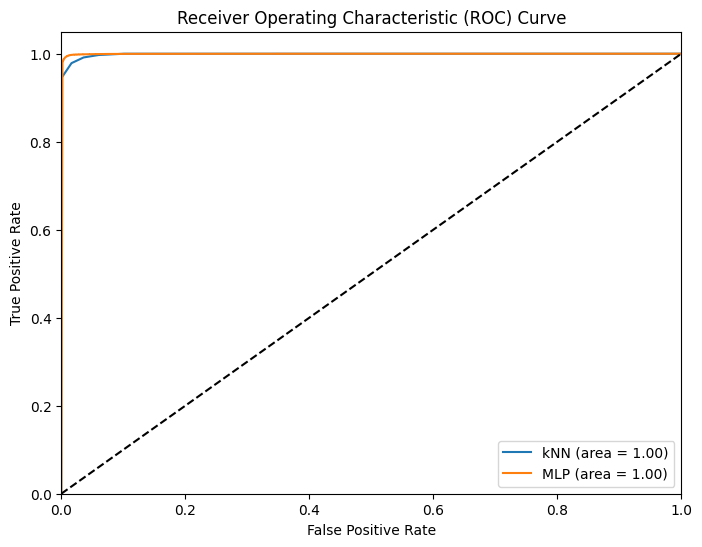

In [53]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

# Calculate the probabilities of each class for the testing set
y_prob_knn = knn.predict_proba(X_test)[:, 1]
y_prob_mlp = best_mlp.predict_proba(X_test)[:, 1]

# Calculate AUC-ROC scores
roc_auc_knn = roc_auc_score(y_test, y_prob_knn)
roc_auc_mlp = roc_auc_score(y_test, y_prob_mlp)

print("AUC-ROC (kNN): {:.2f}".format(roc_auc_knn))
print("AUC-ROC (MLP): {:.2f}".format(roc_auc_mlp))

# Calculate ROC curve for kNN
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn)
# Calculate ROC curve for MLP
fpr_mlp, tpr_mlp, _ = roc_curve(y_test, y_prob_mlp)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, label='kNN (area = %0.2f)' % roc_auc_knn)
plt.plot(fpr_mlp, tpr_mlp, label='MLP (area = %0.2f)' % roc_auc_mlp)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [54]:
data.shape

(75950, 68)

# Support vector machine

In [55]:
#import libraries
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix

In [56]:
# Split the dataset into training and testing sets
X = data.drop(['label', 'URL', 'FILENAME', 'Domain'], axis=1)
y = data['label']

SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=SEED)

# Standardize the dataset. Scale both X_train and X_test

# use the function scaler.transform
scaler = StandardScaler()

# Fit only on X_train
scaler.fit(X_train)

# Scale both X_train and X_test
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [89]:
#train model using rbf kernel
svm_model = SVC(kernel='rbf')
svm_model.fit(X_train,y_train)
y_pred = svm_model.predict(X_test)

In [90]:
# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Detailed classification report
print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test,y_pred))

Accuracy: 99.98%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12891
           1       1.00      1.00      1.00     25084

    accuracy                           1.00     37975
   macro avg       1.00      1.00      1.00     37975
weighted avg       1.00      1.00      1.00     37975

[[12885     6]
 [    0 25084]]


In [59]:
!pip install mlxtend

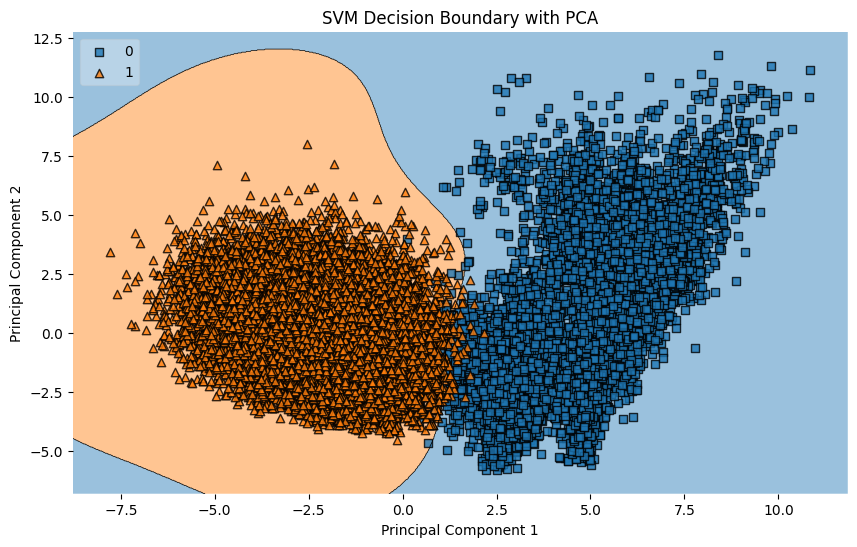

In [91]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

# Apply PCA to reduce the features to 2 dimensions
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

# Refit the SVM model on the reduced data
svm_model_pca = SVC(kernel = 'rbf')
svm_model_pca.fit(X_train_pca, y_train)

# Plot the decision boundary
plt.figure(figsize=(10, 6))
plot_decision_regions(X_train_pca, y_train.values, clf=svm_model_pca, legend=2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('SVM Decision Boundary with PCA')
plt.show()



# XGboost

In [61]:
#import libraries
import xgboost as xgb

In [62]:
#intialize model
xgb_model = xgb.XGBClassifier(objective = 'binary:logistic', eval_metric = 'logloss', use_label_encoder = False)

#Train the model
xgb_model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [63]:
#model evaluation
y_pred = xgb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy * 100:.2f}%')

print("\nClassification Report: ")
print(classification_report(y_test,y_pred))

print("\nConfusion Matrix: ")
print(confusion_matrix(y_test, y_pred))

Accuracy: 100.00%

Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12891
           1       1.00      1.00      1.00     25084

    accuracy                           1.00     37975
   macro avg       1.00      1.00      1.00     37975
weighted avg       1.00      1.00      1.00     37975


Confusion Matrix: 
[[12890     1]
 [    0 25084]]


In [64]:
#hyperparameter tuning usng grid search

from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth' : [3,5,7], 'learning_rate' : [0.01,0.1,0.2], 'n_estimators' : [50, 100, 200]}

grid_search = GridSearchCV(estimator = xgb.XGBClassifier(eval_metric = 'logloss'), param_grid = param_grid, scoring = 'accuracy', cv = 3)

grid_search.fit(X_train, y_train)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Bets Accuracy: {grid_search.best_score_ * 100:.2f}%")

Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
Bets Accuracy: 100.00%


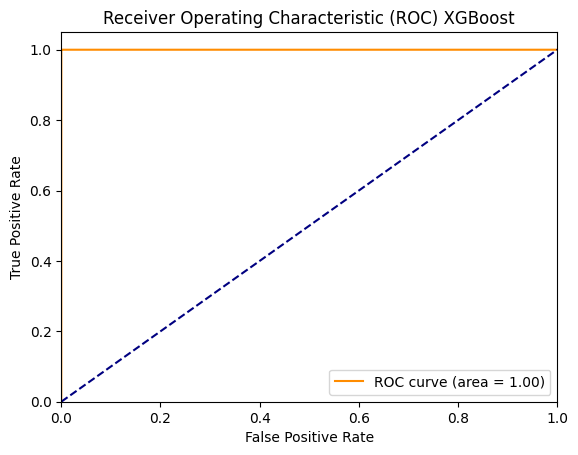

In [65]:
#Plotting AUC-ROC curve

y_pred_proba = grid_search.predict_proba(X_test)[:,1]

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) XGBoost')
plt.legend(loc="lower right")
plt.show()


# Advanced model (Decision Trees)

In [66]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


### Train model using `DecisionTreeClassifier`

In [67]:
# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the model
dt_classifier.fit(X_train, y_train)

# Make predictions
y_pred = dt_classifier.predict(X_test)

### Calcuting Accuracy for Decision Trees

In [68]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12891
           1       1.00      1.00      1.00     25084

    accuracy                           1.00     37975
   macro avg       1.00      1.00      1.00     37975
weighted avg       1.00      1.00      1.00     37975


Confusion Matrix:
[[12891     0]
 [    0 25084]]


### Decision Tree AUC-ROC Analysis

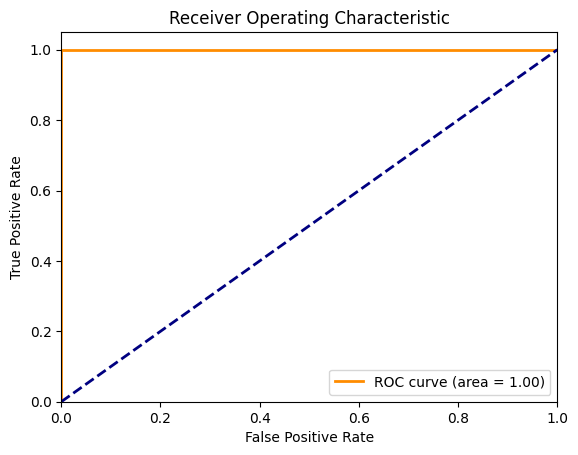

In [69]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve and ROC area for each class
y_score = dt_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Advanced NN (Transformer)

In [70]:
!pip install transformers
!pip install optuna

### Prepare Your Data

In [71]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Prepare features and target
X = data['URL']  # Use the URL column as input
y = data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Tokenize the URLs for Transformer

In [72]:
from transformers import BertTokenizer

# Load pre-trained tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize the URLs
train_encodings = tokenizer(list(X_train), truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(list(X_test), truncation=True, padding=True, max_length=128)

### Create a Dataset Class

In [73]:
import torch

class URLDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = URLDataset(train_encodings, y_train.tolist())
test_dataset = URLDataset(test_encodings, y_test.tolist())

### Load the Transformer Model

In [74]:
from transformers import BertForSequenceClassification

# Load pre-trained model
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [75]:
!pip3 install 'transformers[torch]'
!pip install --upgrade 'accelerate>=0.26.0'
!pip3 show accelerate

Name: accelerate
Version: 1.1.1
Summary: Accelerate
Home-page: https://github.com/huggingface/accelerate
Author: The HuggingFace team
Author-email: zach.mueller@huggingface.co
License: Apache
Location: /system/conda/miniconda3/envs/cloudspace/lib/python3.10/site-packages
Requires: huggingface-hub, numpy, packaging, psutil, pyyaml, safetensors, torch
Required-by: 


### Define Training Arguments

In [76]:
!which python3
!pip install tf-keras

/home/zeus/miniconda3/envs/cloudspace/bin/python3


In [77]:
!pip uninstall transformers accelerate
!pip install "transformers>=4.30.0" "accelerate>=0.26.0"

Found existing installation: transformers 4.46.2
Uninstalling transformers-4.46.2:
  Would remove:
    /system/conda/miniconda3/envs/cloudspace/bin/transformers-cli
    /system/conda/miniconda3/envs/cloudspace/lib/python3.10/site-packages/transformers-4.46.2.dist-info/*
    /system/conda/miniconda3/envs/cloudspace/lib/python3.10/site-packages/transformers/*
Proceed (Y/n)? ^C
ERROR: Operation cancelled by user


In [78]:
from transformers import TrainingArguments

# Define training arguments
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=64,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    evaluation_strategy="epoch"
)

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


### Train and Evaluate the Model with cross validation

In [80]:

from transformers import Trainer
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.model_selection import StratifiedKFold
import numpy as np

# Define a compute metrics function
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='binary')
    acc = accuracy_score(labels, preds)
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Prepare arrays to store results
accuracies = []
f1_scores = []

# Perform cross-validation
for train_index, val_index in skf.split(X, y):
    # Create train and validation datasets
    train_encodings = tokenizer(list(X.iloc[train_index]), truncation=True, padding=True, max_length=128)
    val_encodings = tokenizer(list(X.iloc[val_index]), truncation=True, padding=True, max_length=128)

    train_dataset = URLDataset(train_encodings, y.iloc[train_index].tolist())
    val_dataset = URLDataset(val_encodings, y.iloc[val_index].tolist())

    # Initialize a new Trainer for each fold
    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=val_dataset,
        compute_metrics=compute_metrics
    )

    # Train the model
    trainer.train()

    # Evaluate the model
    eval_result = trainer.evaluate()

    # Store the results
    accuracies.append(eval_result['eval_accuracy'])
    f1_scores.append(eval_result['eval_f1'])

# Calculate average metrics
average_accuracy = np.mean(accuracies)
average_f1 = np.mean(f1_scores)

print(f"Average Accuracy: {average_accuracy:.4f}")
print(f"Average F1 Score: {average_f1:.4f}")

Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.001500,0.028041,0.995853,0.996880,0.993780,1.000000
2,0.001400,0.020284,0.997038,0.997769,0.995647,0.999901
3,0.041100,0.020430,0.996708,0.997522,0.995155,0.999901


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.689700,0.639303,0.662607,0.797070,0.662607,1.000000
2,0.671100,0.639298,0.662607,0.797070,0.662607,1.000000
3,0.666300,0.640021,0.662607,0.797070,0.662607,1.000000


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.653300,0.643821,0.662673,0.797118,0.662673,1.000000
2,0.001800,0.025830,0.996050,0.997029,0.994075,1.000000
3,0.077900,0.025519,0.996050,0.997029,0.994075,1.000000


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.120900,0.044877,0.992034,0.994026,0.988122,1.000000
2,0.529200,0.553437,0.736669,0.834245,0.715626,1.000000
3,0.037400,0.027551,0.995589,0.996683,0.993485,0.999901


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.036100,0.047121,0.991178,0.993388,0.986863,1.000000
2,0.070700,0.045058,0.992034,0.994026,0.988122,1.000000
3,0.036300,0.045795,0.992034,0.994026,0.988122,1.000000


Average Accuracy: 0.9286
Average F1 Score: 0.9565


### Accuracy Testing

In [81]:
# Make predictions
predictions = trainer.predict(test_dataset)
y_pred = predictions.predictions.argmax(-1)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.2f}")

Test Accuracy: 0.99


### Hyperparameter Tuning

In [82]:
import optuna
from transformers import Trainer
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Define a compute metrics function
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='binary')
    acc = accuracy_score(labels, preds)
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

# Define the objective function for Optuna
def objective(trial):
    # Suggest hyperparameters
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 5e-5)
    num_train_epochs = trial.suggest_int('num_train_epochs', 2, 5)
    per_device_train_batch_size = trial.suggest_categorical('per_device_train_batch_size', [8, 16, 32])

    # Update training arguments with suggested hyperparameters
    training_args.learning_rate = learning_rate
    training_args.num_train_epochs = num_train_epochs
    training_args.per_device_train_batch_size = per_device_train_batch_size

    # Initialize Trainer
    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=test_dataset,
        compute_metrics=compute_metrics
    )

    # Train the model
    trainer.train()

    # Evaluate the model
    eval_result = trainer.evaluate()

    # Return the evaluation metric to be optimized
    return eval_result['eval_accuracy']

# Create a study and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)

# Print the best hyperparameters
print("Best hyperparameters: ", study.best_params)

[I 2024-11-14 15:23:33,901] A new study created in memory with name: no-name-538ba757-72d5-4601-a335-93abe4a8f930
/tmp/ipykernel_28003/1302086799.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 5e-5)


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.002400,0.055968,0.990586,0.992898,0.985896,1.000000
2,0.001800,0.057225,0.990586,0.992898,0.985896,1.000000


[I 2024-11-14 15:49:36,629] Trial 0 finished with value: 0.9905859117840685 and parameters: {'learning_rate': 1.2731329599056165e-05, 'num_train_epochs': 2, 'per_device_train_batch_size': 8}. Best is trial 0 with value: 0.9905859117840685.
/tmp/ipykernel_28003/1302086799.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 5e-5)


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.107200,0.041208,0.992495,0.994330,0.988724,1.000000
2,0.049000,0.039403,0.992890,0.994627,0.989311,1.000000
3,0.020800,0.034690,0.993943,0.995419,0.990880,1.000000
4,0.051400,0.034739,0.993943,0.995419,0.990880,1.000000


[I 2024-11-14 16:19:41,368] Trial 1 finished with value: 0.9939433838051349 and parameters: {'learning_rate': 3.2806637013369744e-05, 'num_train_epochs': 4, 'per_device_train_batch_size': 32}. Best is trial 1 with value: 0.9939433838051349.
/tmp/ipykernel_28003/1302086799.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 5e-5)


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.001500,0.029698,0.995392,0.996511,0.993046,1.000000
2,0.001600,0.046890,0.992495,0.994330,0.988724,1.000000
3,0.001300,0.047113,0.992627,0.994429,0.988920,1.000000


[I 2024-11-14 16:58:26,340] Trial 2 finished with value: 0.992626728110599 and parameters: {'learning_rate': 1.691840373263493e-05, 'num_train_epochs': 3, 'per_device_train_batch_size': 8}. Best is trial 1 with value: 0.9939433838051349.
/tmp/ipykernel_28003/1302086799.py:21: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 5e-5)


Epoch,Training Loss,Validation Loss


[W 2024-11-14 17:04:48,479] Trial 3 failed with parameters: {'learning_rate': 3.194298178361247e-05, 'num_train_epochs': 3, 'per_device_train_batch_size': 16} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/optuna/study/_optimize.py", line 197, in _run_trial
    value_or_values = func(trial)
  File "/tmp/ipykernel_28003/1302086799.py", line 40, in objective
    trainer.train()
  File "/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/transformers/trainer.py", line 2123, in train
    return inner_training_loop(
  File "/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/transformers/trainer.py", line 2486, in _inner_training_loop
    and (torch.isnan(tr_loss_step) or torch.isinf(tr_loss_step))
KeyboardInterrupt
[W 2024-11-14 17:04:48,481] Trial 3 failed with value None.


KeyboardInterrupt: 

### AUC-ROC Analysis

AUC-ROC: 0.99


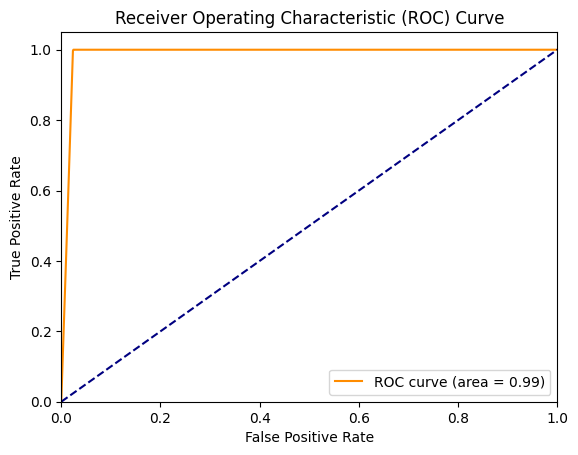

In [83]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

# Calculate probabilities for the positive class
y_prob = predictions.predictions[:, 1]

# Calculate AUC-ROC score
roc_auc = roc_auc_score(y_test, y_prob)
print(f"AUC-ROC: {roc_auc:.2f}")

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## ROC-AUC curve for all models

In [1]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

#data for transformer model
# Prepare features and target
X_transformer = data['URL']  # Use the URL column as input
y_transformer = data['label']

# Split the data into training and testing sets
X_train_transformer, X_test_transformer, y_train_transformer, y_test_transformer = train_test_split(X_transformer, y_transformer, test_size=0.2, random_state=42)

#data for all other models
# Split the dataset into training and testing sets
X = data.drop(['label', 'URL', 'FILENAME', 'Domain'], axis=1)
y = data['label']

SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=SEED)

# Standardize the dataset. Scale both X_train and X_test

# use the function scaler.transform
scaler = StandardScaler()

# Fit only on X_train
scaler.fit(X_train)

# Scale both X_train and X_test
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

# Calculate probabilities and AUC-ROC scores for each model

# Transformer model (already calculated, just reuse variables)
y_prob_transformer = predictions.predictions[:, 1]
roc_auc_transformer = roc_auc_score(y_test_transformer, y_prob_transformer)
fpr_transformer, tpr_transformer, _ = roc_curve(y_test_transformer, y_prob_transformer)

# kNN model
y_prob_knn = knn.predict_proba(X_test)[:, 1]
roc_auc_knn = roc_auc_score(y_test, y_prob_knn)
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn)

# MLP model
y_prob_mlp = mlp.predict_proba(X_test)[:, 1]
roc_auc_mlp = roc_auc_score(y_test, y_prob_mlp)
fpr_mlp, tpr_mlp, _ = roc_curve(y_test, y_prob_mlp)

# SVM model
y_prob_svm = svm_model.decision_function(X_test)
roc_auc_svm = roc_auc_score(y_test, y_prob_svm)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm)

# Decision Tree model
y_prob_dt = dt_classifier.predict_proba(X_test)[:, 1]
roc_auc_dt = roc_auc_score(y_test, y_prob_dt)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)

# XGB model
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]
roc_auc_xgb = roc_auc_score(y_test, y_prob_xgb)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)

# Logistic Regression model
y_prob_log_reg = log_reg.predict_proba(X_test)[:, 1]
roc_auc_log_reg = roc_auc_score(y_test, y_prob_log_reg)
fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, y_prob_log_reg)

# Plotting all ROC curves
plt.figure(figsize=(12, 8))

# Transformer Model
plt.plot(fpr_transformer, tpr_transformer, label='Transformer (AUC = %0.2f)' % roc_auc_transformer, color='darkorange')

# kNN Model
plt.plot(fpr_knn, tpr_knn, label='kNN (AUC = %0.2f)' % roc_auc_knn, color='blue')

# MLP Model
plt.plot(fpr_mlp, tpr_mlp, label='MLP (AUC = %0.2f)' % roc_auc_mlp, color='green')

# SVM Model
plt.plot(fpr_svm, tpr_svm, label='SVM (AUC = %0.2f)' % roc_auc_svm, color='red')

# Decision Tree Model
plt.plot(fpr_dt, tpr_dt, label='Decision Tree (AUC = %0.2f)' % roc_auc_dt, color='purple')

# XGB Model
plt.plot(fpr_xgb, tpr_xgb, label='XGB (AUC = %0.2f)' % roc_auc_xgb, color='orange')

# Logistic Regression Model
plt.plot(fpr_log_reg, tpr_log_reg, label='Logistic Regression (AUC = %0.2f)' % roc_auc_log_reg, color='brown')

# Random prediction line (baseline)
plt.plot([0, 1], [0, 1], 'k--')

# Plot settings
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves for Multiple Models')
plt.legend(loc="lower right")
plt.grid()
plt.show()


NameError: name 'data' is not defined

In [93]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance


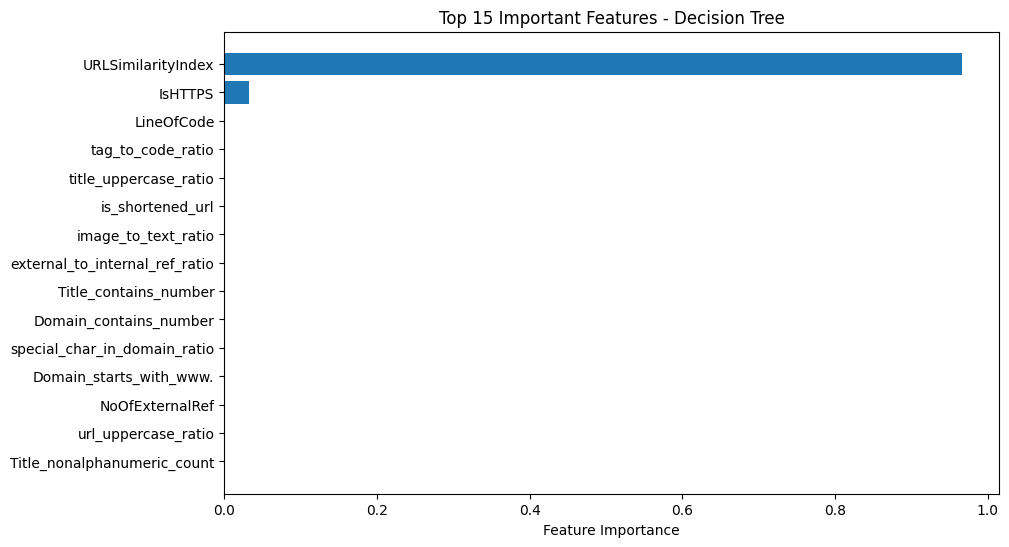

In [94]:
# Get feature importances from the Decision Tree model
feature_importances_dt = dt_classifier.feature_importances_
top_indices_dt = np.argsort(feature_importances_dt)[-15:][::-1]

# Plotting the top 15 features
plt.figure(figsize=(10, 6))
plt.barh(range(15), feature_importances_dt[top_indices_dt], align='center')
plt.yticks(range(15), X.columns[top_indices_dt])
plt.xlabel("Feature Importance")
plt.title("Top 15 Important Features - Decision Tree")
plt.gca().invert_yaxis()
plt.show()


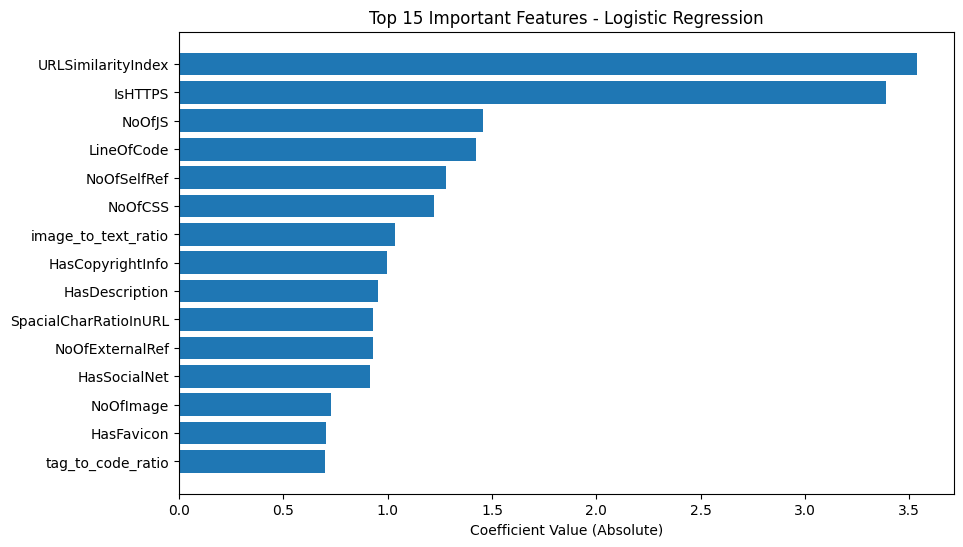

In [95]:
# Get feature coefficients from Logistic Regression model
feature_importances_log_reg = np.abs(log_reg.coef_[0])
top_indices_log_reg = np.argsort(feature_importances_log_reg)[-15:][::-1]

# Plotting the top 15 features
plt.figure(figsize=(10, 6))
plt.barh(range(15), feature_importances_log_reg[top_indices_log_reg], align='center')
plt.yticks(range(15), X.columns[top_indices_log_reg])
plt.xlabel("Coefficient Value (Absolute)")
plt.title("Top 15 Important Features - Logistic Regression")
plt.gca().invert_yaxis()
plt.show()


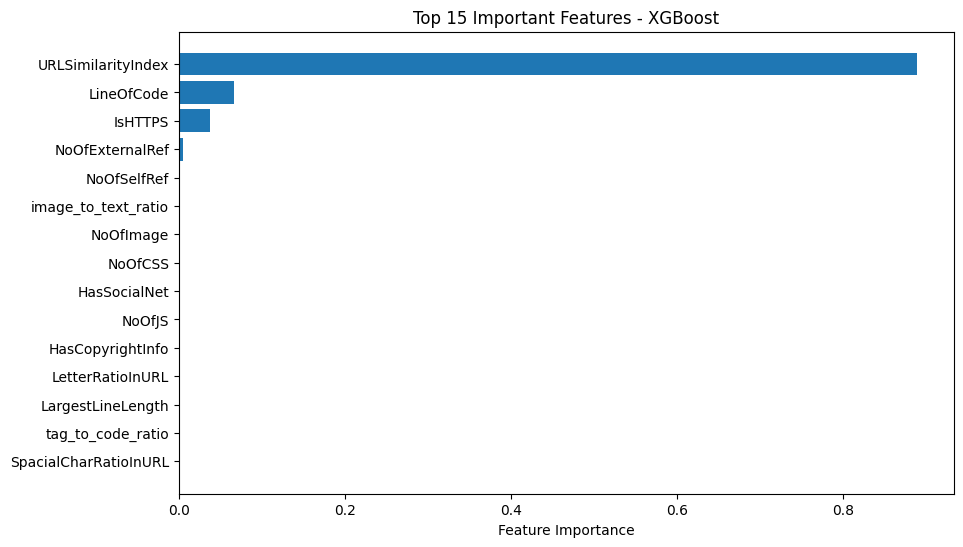

In [97]:
# Get feature importances from XGBoost model
feature_importances_xgb = xgb_model.feature_importances_
top_indices_xgb = np.argsort(feature_importances_xgb)[-15:][::-1]

# Plotting the top 15 features
plt.figure(figsize=(10, 6))
plt.barh(range(15), feature_importances_xgb[top_indices_xgb], align='center')
plt.yticks(range(15), X.columns[top_indices_xgb])
plt.xlabel("Feature Importance")
plt.title("Top 15 Important Features - XGBoost")
plt.gca().invert_yaxis()
plt.show()


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  

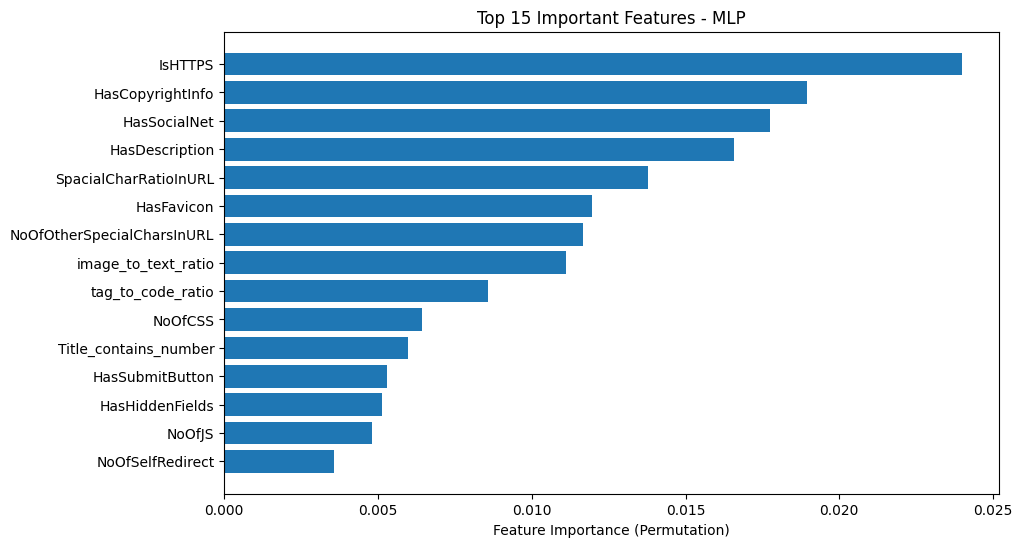

In [100]:


# Compute permutation importance for MLP
perm_importance_mlp = permutation_importance(mlp, X_test, y_test, n_repeats=10, random_state=42)
top_indices_mlp = np.argsort(perm_importance_mlp.importances_mean)[-15:][::-1]

# Plotting the top 15 features for MLP
plt.figure(figsize=(10, 6))
plt.barh(range(15), perm_importance_mlp.importances_mean[top_indices_mlp], align='center')
plt.yticks(range(15), X.columns[top_indices_mlp])
plt.xlabel("Feature Importance (Permutation)")
plt.title("Top 15 Important Features - MLP")
plt.gca().invert_yaxis()
plt.show()



In [ ]:
from sklearn.inspection import permutation_importance

# Compute permutation importance for SVM
perm_importance_svm = permutation_importance(svm_model, X_test, y_test, n_repeats=10, random_state=42)
top_indices_svm = np.argsort(perm_importance_svm.importances_mean)[-15:][::-1]

# Plotting the top 15 features for SVM
plt.figure(figsize=(10, 6))
plt.barh(range(15), perm_importance_svm.importances_mean[top_indices_svm], align='center')
plt.yticks(range(15), X.columns[top_indices_svm])
plt.xlabel("Feature Importance (Permutation)")
plt.title("Top 15 Important Features - SVM")
plt.gca().invert_yaxis()
plt.show()

# Compute permutation importance for kNN
perm_importance_knn = permutation_importance(knn, X_test, y_test, n_repeats=10, random_state=42)
top_indices_knn = np.argsort(perm_importance_knn.importances_mean)[-15:][::-1]

# Plotting the top 15 features for kNN
plt.figure(figsize=(10, 6))
plt.barh(range(15), perm_importance_knn.importances_mean[top_indices_knn], align='center')
plt.yticks(range(15), X.columns[top_indices_knn])
plt.xlabel("Feature Importance (Permutation)")
plt.title("Top 15 Important Features - kNN")
plt.gca().invert_yaxis()
plt.show()

In [101]:
from transformers import AutoTokenizer

# Directory where you want to save the model
output_dir = "./saved_transformer_model"

# Create the output directory if it doesn't exist
import os
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Save the model
model.save_pretrained(output_dir)

# Save the tokenizer (assuming you have a tokenizer as well)
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")  # or the tokenizer you used initially
tokenizer.save_pretrained(output_dir)

print(f"Model and tokenizer saved to {output_dir}")


Model and tokenizer saved to ./saved_transformer_model


In [1]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
phiusiil_phishing_url_website = fetch_ucirepo(id=967)

# data (as pandas dataframes)
X = phiusiil_phishing_url_website.data.features
y = phiusiil_phishing_url_website.data.targets

# metadata
print(phiusiil_phishing_url_website.metadata)

# variable information
print(phiusiil_phishing_url_website.variables)

{'uci_id': 967, 'name': 'PhiUSIIL Phishing URL (Website)', 'repository_url': 'https://archive.ics.uci.edu/dataset/967/phiusiil+phishing+url+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/967/data.csv', 'abstract': 'PhiUSIIL Phishing URL Dataset is a substantial dataset comprising 134,850 legitimate and 100,945 phishing URLs. Most of the URLs we analyzed, while constructing the dataset, are the latest URLs. Features are extracted from the source code of the webpage and URL. Features such as CharContinuationRate, URLTitleMatchScore, URLCharProb, and TLDLegitimateProb are derived from existing features.', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 235795, 'num_features': 54, 'feature_types': ['Real', 'Categorical', 'Integer'], 'demographics': [], 'target_col': ['label'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2024, 'last_updated': 'Sun May 12 

In [6]:
import pandas as pd
from ucimlrepo import fetch_ucirepo

# Step 1: Load your local dataset
local_file_path = 'datasets/filtered_phishing_data.csv'
local_data = pd.read_csv(local_file_path)

# Step 2: Fetch the UCI Phishing URL dataset
phiusiil_phishing_url_website = fetch_ucirepo(id=967)
uci_data = phiusiil_phishing_url_website.data.features
uci_data['label'] = phiusiil_phishing_url_website.data.targets  # Add 'label' column to UCI data

# Step 3: Extract URLs and compare
local_urls = local_data['URL']  # Assuming the column in your dataset is named 'URL'
uci_filtered = uci_data[~uci_data['URL'].isin(local_urls)]  # Filter rows not in the local dataset

# Step 4: Save the result to a new CSV file
output_file_path = 'datasets/testing_phishing_data.csv'
uci_filtered.to_csv(output_file_path, index=False)

print(f"Missing URLs and labels saved to {output_file_path}")



/var/folders/y3/f9xzvgsj1273rvcj24gl4yg80000gn/T/ipykernel_3533/2193664830.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uci_data['label'] = phiusiil_phishing_url_website.data.targets  # Add 'label' column to UCI data


Missing URLs and labels saved to datasets/testing_phishing_data.csv


In [8]:
import pandas as pd

# Load the dataset
file_path = 'datasets/testing_phishing_dataset.csv'
data = pd.read_csv(file_path)

# Keep only the 'URL' and 'label' columns
filtered_data = data[['URL', 'label']]

# Save the filtered dataset back to a file
output_file_path = 'datasets/testing_phishing_dataset.csv'
filtered_data.to_csv(output_file_path, index=False)

print(f"Filtered dataset saved to {output_file_path}")


Filtered dataset saved to datasets/testing_phishing_dataset.csv
